In [2]:
import Graph
import pandas as pd
import json
from ast import literal_eval

In [6]:
mbti_list = ['ISTJ','ISFJ','INFJ','INTJ',
                        'ISTP','ISFP','INFP','INTP',
                        'ESTP','ESFP','ENFP','ENTP',
                        'ESTJ','ESFJ','ENFJ','ENTJ']

In [21]:
mbti_list = ['ISFP','INFP','INTP',
                        'ESTP','ESFP','ENFP','ENTP',
                        'ESTJ','ESFJ','ENFJ','ENTJ']

In [5]:
movie = pd.read_csv('./movie_network.csv')
movie['keywords']=movie['keywords'].apply(lambda x:literal_eval(x))

In [9]:
movie

,nfid,title,keywords
0,80987077,시그널,"[(긴박, 1.0), (어두운, 0.9), (긴장감 넘치는, 0.9), (드라마, ..."
1,80987077,시그널,"[(의식, 0.16277122), (딕션, 0.13345009), (정확, 0.13..."
2,80987077,시그널,"[(각본, 0.5), (연기, 0.5), (어두운, 0.9), (긴장감 넘치는, 0..."
3,80987077,시그널,"[(수요일, 0.08324355), (월요일, 0.08324355), (민중, 0...."
4,80987077,시그널,"[(사건, 0.32075787), (작품, 0.22641402), (시그널, 0.2..."
...,...,...,...
95286,80158285,리전,"[(지루, 0.5868508), (우스꽝, 0.41314918), (발상의 전환, ..."
95287,80158285,리전,"[(기대, 1.0), (발상의 전환, 0.9), (SF 시리즈, 0.9), (미국 ..."
95288,80158285,리전,"[(시청, 1.0), (발상의 전환, 0.9), (SF 시리즈, 0.9), (미국 ..."
95289,80158285,리전,"[(감정, 1.0), (발상의 전환, 0.9), (SF 시리즈, 0.9), (미국 ..."


In [18]:
mbti = pd.read_csv('./network_mbti.csv')
mbti['keywords']=mbti['keywords'].apply(lambda x:literal_eval(x))

In [19]:
data= pd.concat([mbti,movie],axis=0)

In [20]:
data

,Unnamed: 0,contents,keywords,nfid,title
0,0.0,istj 현실주의자 conclusion 결론 결론 현실주의자만큼 실용적이고 헌신적인...,"[(실용, 0.25), (헌신, 0.25), (노력, 0.25), (유지, 0.25...",NaN,NaN
1,1.0,istj 현실주의자 workpl ce h bits 직장 습관 직장 습관 현실주의자는...,"[(책임, 0.0728632), (직원, 0.0728632), (동료, 0.0508...",NaN,NaN
2,2.0,istj 현실주의자 c reer p ths 직업 진로 직업 진로 많은 유형의 사람들...,"[(안정, 0.09455757), (명확, 0.09455757), (역할, 0.09...",NaN,NaN
3,3.0,istj 현실주의자 p renthood 육아 부모 육아 부모 현실주의자들은 부모의 ...,"[(부모, 0.16327244), (역할, 0.087746836), (자신, 0.0...",NaN,NaN
4,4.0,istj 현실주의자 friendships 우정 우정 현실주의자 친구는 자발적인 편이...,"[(형성, 0.1214776), (자신, 0.1214776), (감탄, 0.1214...",NaN,NaN
...,...,...,...,...,...
95286,NaN,NaN,"[(지루, 0.5868508), (우스꽝, 0.41314918), (발상의 전환, ...",80158285.0,리전
95287,NaN,NaN,"[(기대, 1.0), (발상의 전환, 0.9), (SF 시리즈, 0.9), (미국 ...",80158285.0,리전
95288,NaN,NaN,"[(시청, 1.0), (발상의 전환, 0.9), (SF 시리즈, 0.9), (미국 ...",80158285.0,리전
95289,NaN,NaN,"[(감정, 1.0), (발상의 전환, 0.9), (SF 시리즈, 0.9), (미국 ...",80158285.0,리전


In [21]:
test = Graph.MakeGraph(mbti_data=data)
edge=test.edge(data)
G = test.G(edge)

In [22]:
test.infoG(G)

Number of nodes 125575
Number of edges 1904603
Average degree 30.334111088990642


In [23]:
en,degrees = test.entity_graph(G,d=5)
# test.save_graph(en,name=f'./network/g2/{mt}_Network_5')

In [24]:
test.save_graph(en,name=f'./network/fullnetwork/FullNetwork_5')

/home/studio/anaconda3/envs/tsne/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


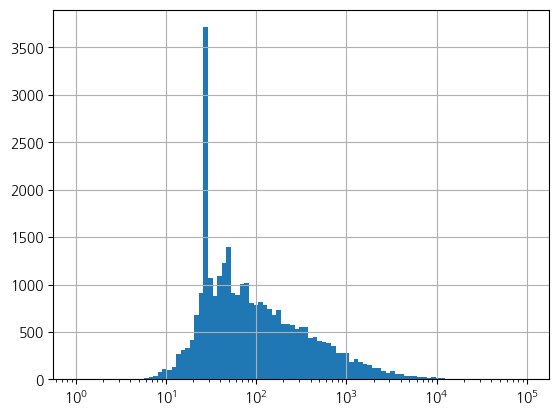

In [26]:
test.plot_Distribution(degrees,100)

In [37]:
fi = test.filter_entity_graph(en,weight=0.08)

In [38]:
c = test.make_community(fi)
print(len(list(c.index)))
nodes = c[c==c.loc["다크"]].index

25591


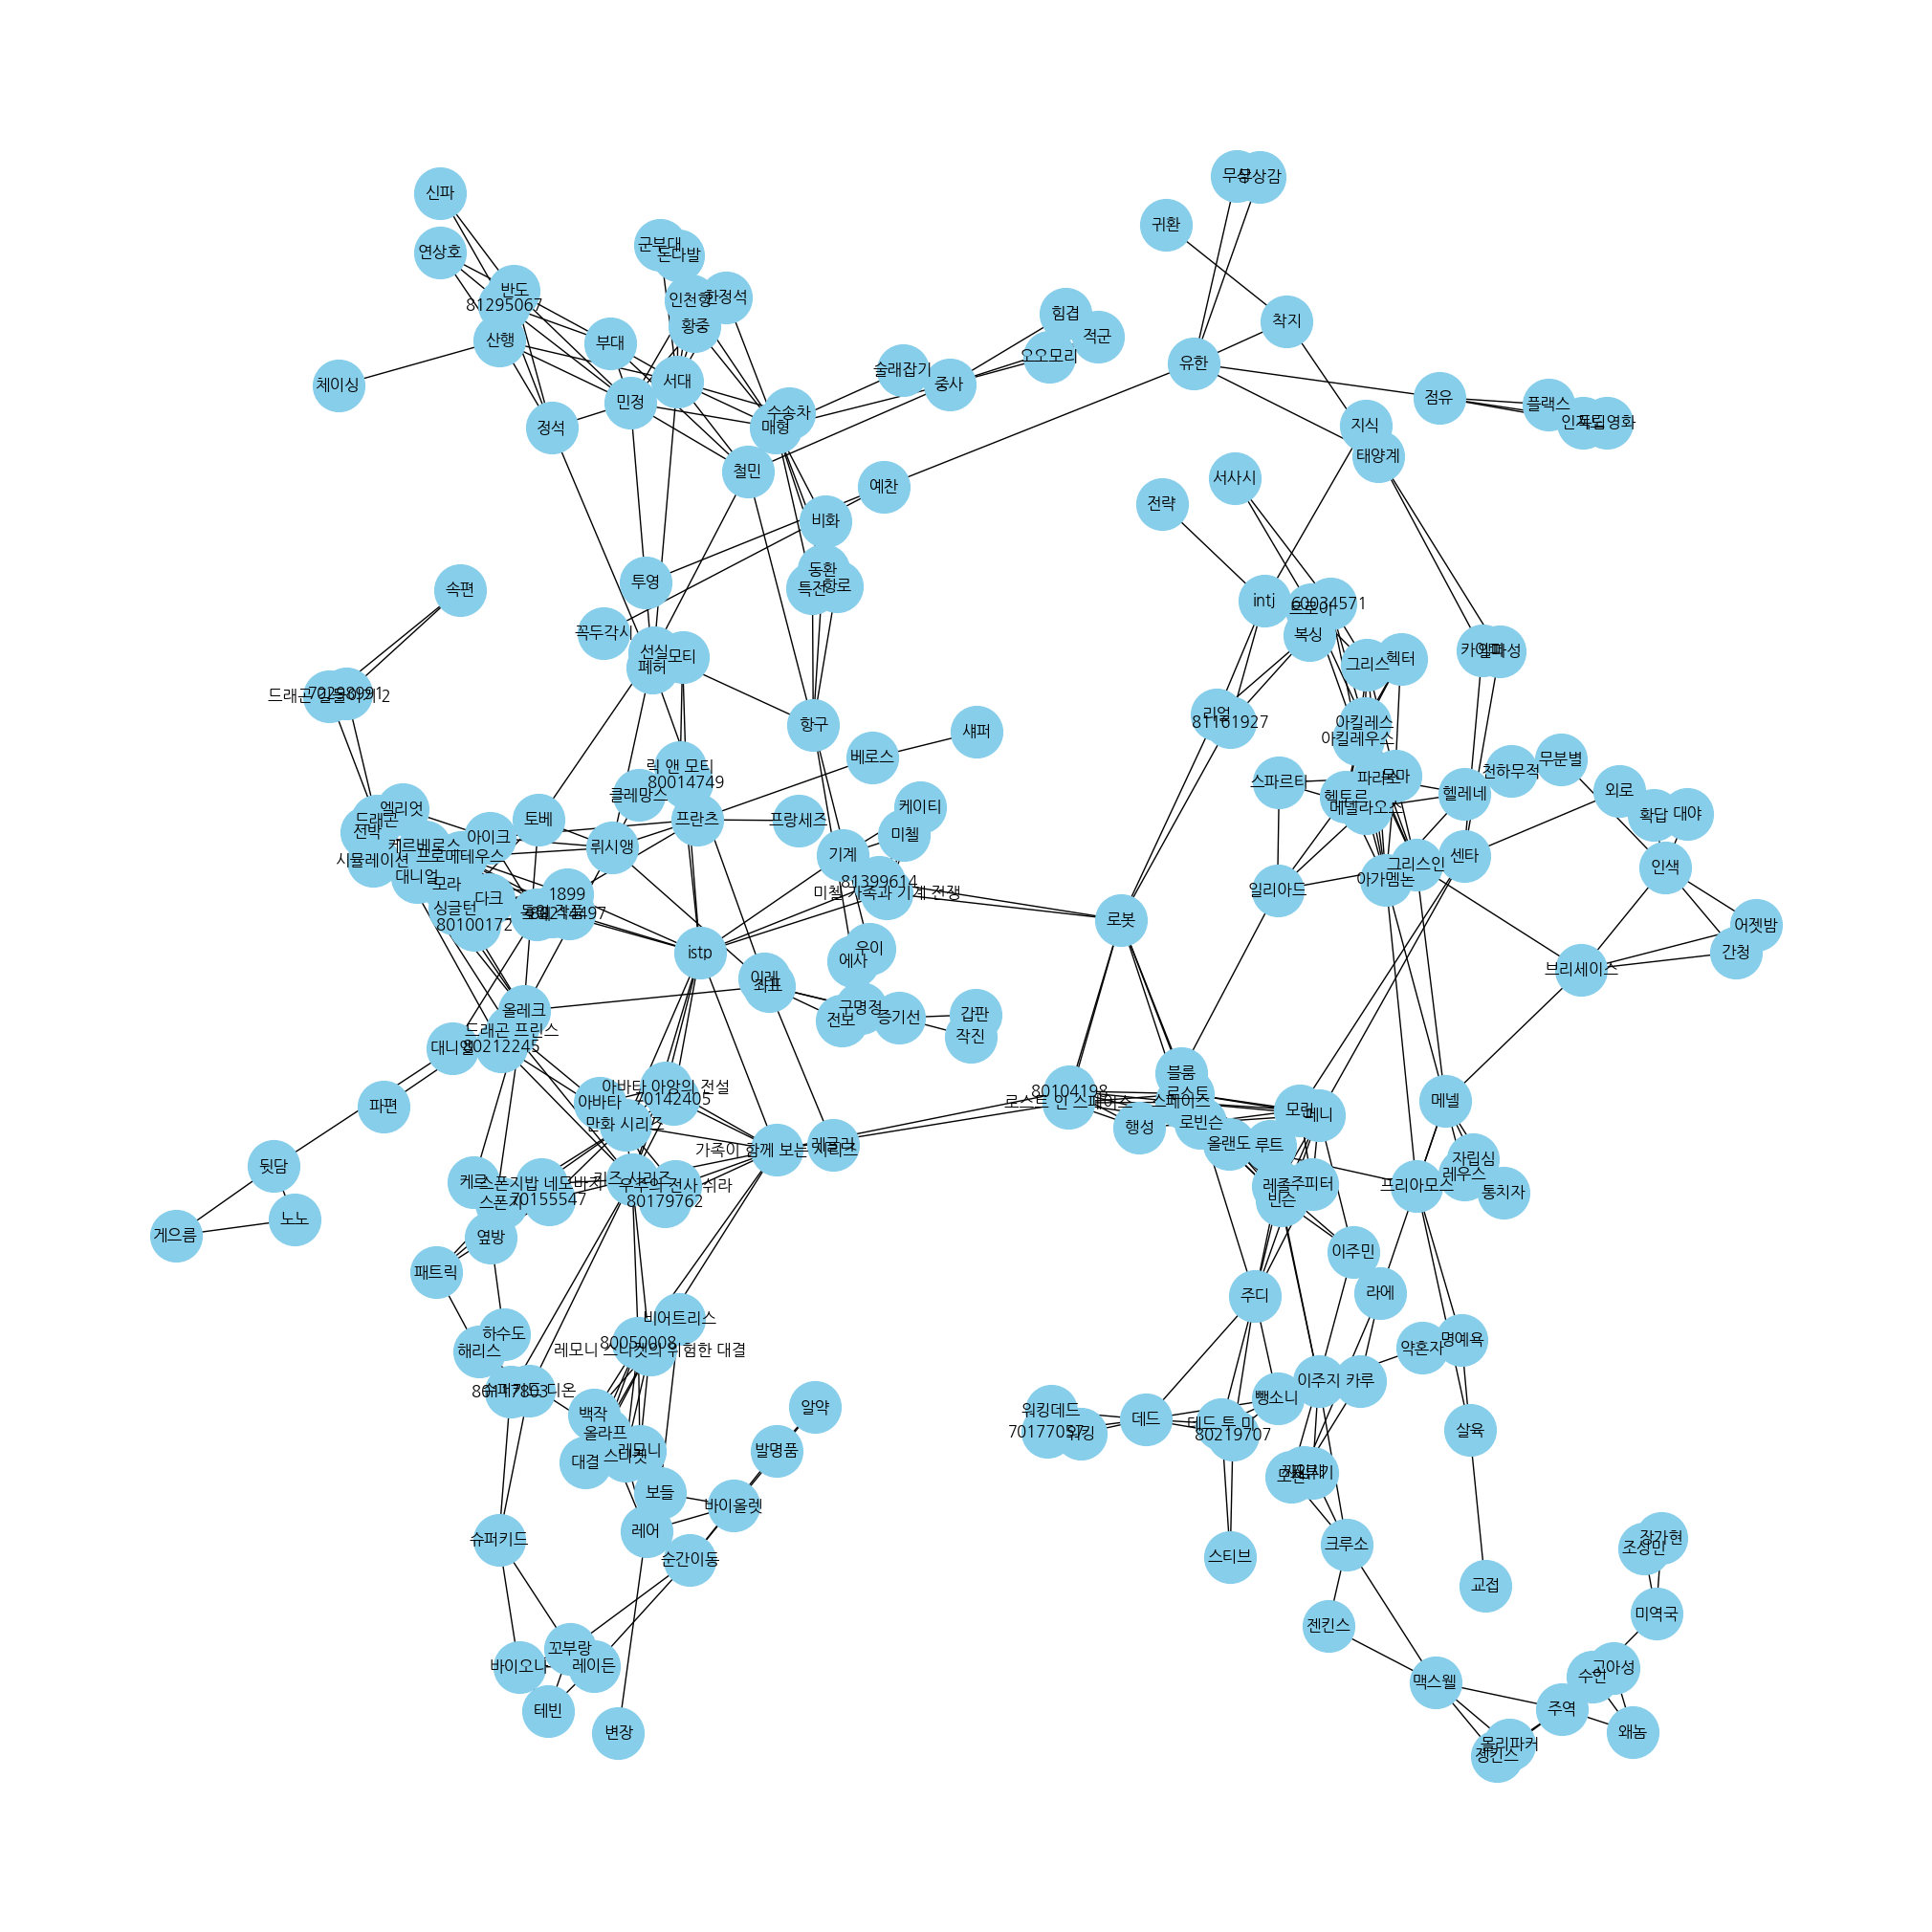

In [39]:
test.draw_community(fi,nodes)

In [ ]:
model = test.model(fi,d=128,w=100)
test.save_model(model,name='./network/fullnetwork/full_model')

In [13]:
data.iloc[3500]

keywords    [(마더, 0.1330293), (살인, 0.1330293), (김혜자, 0.103...
nfid                                               70118372.0
title                                                      마더
Name: 3500, dtype: object

In [ ]:
test = Graph.MakeGraph(mbti_data=data)
edge=test.edge(data)
G = test.G(edge)
# en,degrees = test.entity_graph(G,d=2)
# test.save_graph(en,name=f'./network/g2/{mt}_Network_5')

In [7]:
for mt in mbti_list:
    print(mt)
    mbti = pd.read_csv(f'./{mt}.csv',index_col=0)
    mbti['keywords']=mbti['keywords'].apply(lambda x:literal_eval(x))
    data= pd.concat([mbti,movie],axis=0)
    data.index = range(len(data))
    test = Graph.MakeGraph(mbti_data=data)
    edge=test.edge(data)
    G = test.G(edge)
    en,degrees = test.entity_graph(G,d=2)
    test.save_graph(en,name=f'./network/graph/ori_{mt}_Network_2')

ISTJ
ISFJ
INFJ
INTJ
ISTP
ISFP
INFP
INTP
ESTP
ESFP
ENFP
ENTP
ESTJ
ESFJ
ENFJ
ENTJ


In [13]:
mbti = pd.read_csv(f'./INTJ.csv',index_col=0)
mbti['keywords']=mbti['keywords'].apply(lambda x:literal_eval(x))

In [ ]:
mbti['keywords']=mbti['keywords'].apply(lambda x:literal_eval(x))

In [4]:
movie['keywords']=movie['keywords'].apply(lambda x:literal_eval(x))

In [5]:
movie

,title,제목,장르모음,특징,기본장르,keywords
nfid,,,,,,
80987077,시그널,시그널,"['드라마', '범죄 시리즈', '스릴러 시리즈', '한국 드라마']","['어두운', '긴장감 넘치는']",드라마,"[(어두운, 0.9), (긴장감 넘치는, 0.9), (드라마, 0.9), (범죄 시..."
70020509,히트,히트,"['액션 & 어드벤처 영화', '미국 영화']",['폭력적인'],액션,"[(폭력적인, 0.9), (액션 & 어드벤처 영화, 0.9), (미국 영화, 0.9..."
80113804,아가씨,아가씨,"['스릴러 영화', '도서 원작 영화', '시대물']","['관능적', '긴장감 넘치는']",드라마,"[(관능적, 0.9), (긴장감 넘치는, 0.9), (스릴러 영화, 0.9), (도..."
70241118,도가니,도가니,"['드라마 영화', '도서 원작 영화', '영화·법정', '실화 바탕 영화', '사...","['어두운', '긴장감 넘치는', '감정을 파고드는']",드라마,"[(어두운, 0.9), (긴장감 넘치는, 0.9), (감정을 파고드는, 0.9), ..."
60002360,쥬라기 공원,쥬라기 공원,"['SF 영화', '고전 영화', '도서 원작 영화', '액션 & 어드벤처 영화',...",[''],액션,"[(SF 영화, 0.9), (고전 영화, 0.9), (도서 원작 영화, 0.9), ..."
...,...,...,...,...,...,...
80100172,다크,다크,"['드라마', '독일 작품', 'SF 시리즈', '미스터리 시리즈', '범죄 시리즈...","['발상의 전환', '으스스한', '불길한']",스릴러,"[(발상의 전환, 0.9), (으스스한, 0.9), (불길한, 0.9), (드라마,..."
70032593,유령신부,유령신부,"['가족 영화', '어린이 & 가족 영화', '로맨틱한 영화', '뮤지컬', '미국...","['색다른', '로맨틱']",판타지,"[(색다른, 0.9), (로맨틱, 0.9), (가족 영화, 0.9), (어린이 & ..."
70155547,스폰지밥 네모바지,스폰지밥 네모바지,"['키즈 시리즈', '코미디 시리즈', '만화 시리즈']",['허당 매력'],키즈,"[(허당 매력, 0.9), (키즈 시리즈, 0.9), (코미디 시리즈, 0.9), ..."


In [18]:
data= pd.concat([mbti,movie],axis=0)
data.index = range(len(data))

In [4]:
test = Graph.MakeGraph(mbti_data=1)

In [21]:
data

,keywords
0,"[(관리자, 0.061883964), (자신, 0.061883964), (기준, 0..."
1,"[(능력, 0.10863345), (자신, 0.08388436), (활용, 0.05..."
2,"[(부모, 0.19559532), (감정, 0.090038784), (해결, 0.0..."
3,"[(전략가, 0.1927205), (관계, 0.13743725), (우정, 0.09..."
4,"[(연애, 0.12849484), (사랑, 0.11665706), (데이트, 0.0..."
...,...
2522,"[(경찰, 0.4785369), (목숨, 0.26073155), (범법자, 0.26..."
2523,"[(사건, 0.5), (필리핀, 0.5), (유쾌 발랄, 0.9), (법정, 0.9..."
2524,"[(등장, 0.5), (소재, 0.5), (색다른, 0.9), (긴장감 넘치는, 0..."
2525,"[(권력, 1.0), (진실을 찾아, 0.9), (감정을 파고드는, 0.9), (범..."


In [28]:
data.iloc[2523]['keywords']

[('사건', 0.5),
 ('필리핀', 0.5),
 ('유쾌 발랄', 0.9),
 ('법정', 0.9),
 ('시리즈', 0.9),
 ('다큐멘터리·역사', 0.9),
 ('다큐시리즈', 0.9),
 ('미국', 0.9),
 ('TV', 0.9),
 ('프로그램', 0.9),
 (81446626, 0.9),
 ('펩시, 내 제트기 내놔!', 0.9)]

In [22]:
edge=test.edge(data)

In [23]:
G = test.G(edge)

In [24]:
test.infoG(G)

Number of nodes 10022
Number of edges 42310
Average degree 8.443424466174417


In [25]:
en,degrees = test.entity_graph(G,d=2)
test.save_graph(en,name=f'intj_Network_2')

/home/studio/anaconda3/envs/tsne/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


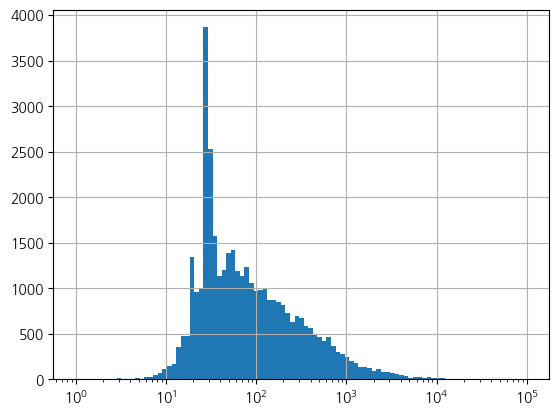

In [22]:
test.plot_Distribution(degrees,100)

In [6]:
en = test.load_graph(name='./network/graph/ori_ISFP_Network_2')

In [7]:
fi = test.filter_entity_graph(en,weight=0.025)

In [66]:
test.save_graph(fi,name='isfp')

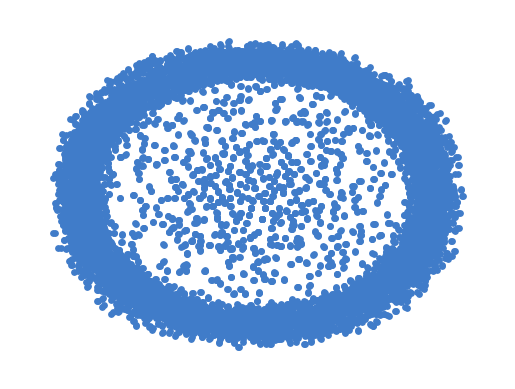

In [193]:
test.draw_Network(fi)

In [15]:
c = test.make_community(fi)
print(len(list(c.index)))
nodes = c[c==c.loc["다크"]].index

33047


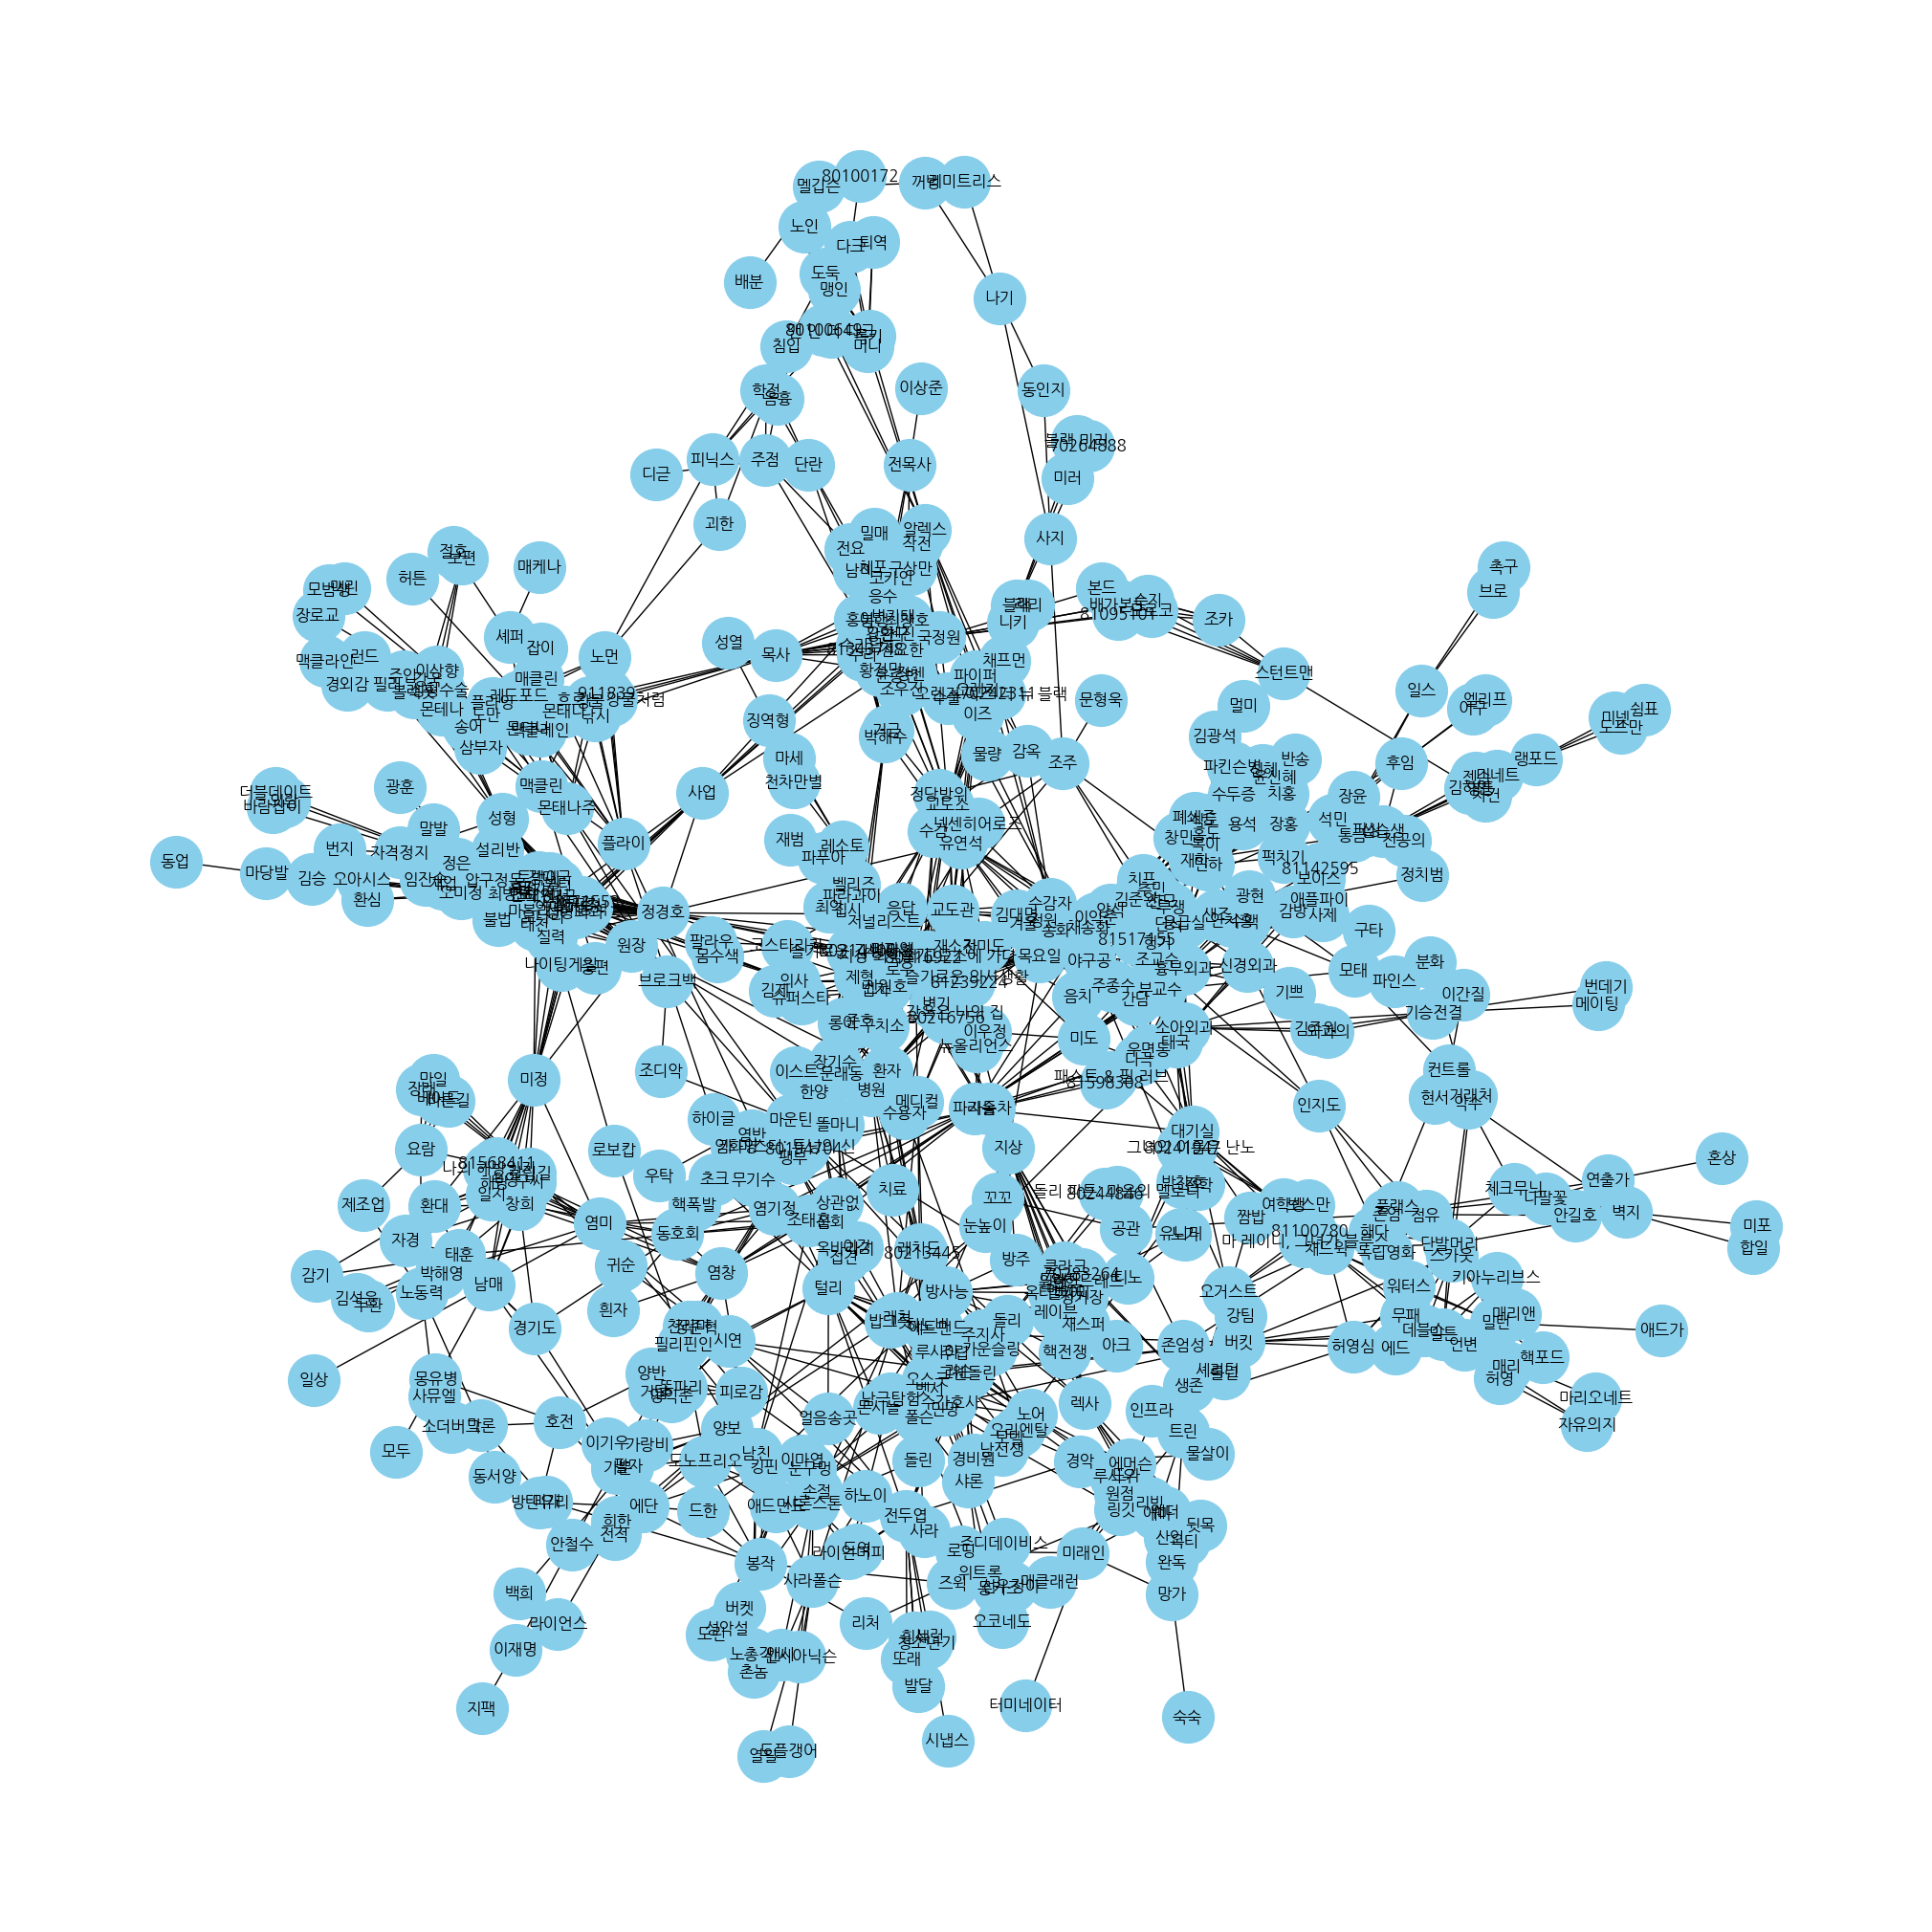

In [16]:
test.draw_community(fi,nodes)

In [42]:
test.save_graph(fi,name='intj')

In [ ]:
em = test.model(fi,d=128)

In [24]:
fi = test.load_graph('filter')

In [8]:
# en1 = gm.load_graph('./network/graph/INFJ_Network_5')
en1 = test.load_graph('./network/graph/ori_INTJ_Network_2')
# fi2 = gm.load_graph('intj')
fi1 = test.filter_entity_graph(en1,weight=0.025)

In [ ]:
model = test.model(fi1,d=5,w=30)

In [10]:
test.save_model(model,name='intj_model')

2023-08-06 17:18:27,091 : INFO : saving Word2VecKeyedVectors object under intj_model.model, separately None
2023-08-06 17:18:27,092 : INFO : not storing attribute vectors_norm
2023-08-06 17:18:27,099 : INFO : saved intj_model.model


In [47]:
em2d = test.tsne(em)

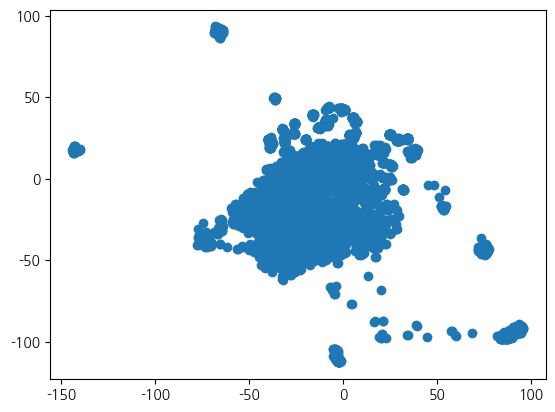

In [48]:
test.draw_tsne(em2d)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def kmeans_model(n,df):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    return kmeans

In [ ]:
df = pd.DataFrame(em2d,index=c.index)

In [ ]:
k_model = kmeans_model(30,df)

In [29]:
topic = pd.read_csv('./final_mbti_topic.csv',index_col=0)

In [30]:
topic['INTJ'].dropna().sort_values(ascending=False).index[:30]

Index(['친구', '현실', '사고', '감정', '관계', '본인', '판단', '지식', '행동', '결정', '인간', '능력',
       '표현', '기준', '효율', '합리', '계획', '외향', '아이디어', '사랑', '이해', '전략가', '논리',
       '인식', '상대', '관심', '목표', '지적', '의견', '이론'],
      dtype='object')

In [31]:
with open(f'./movie_topic2.json', 'r') as f:
    movie_topic = json.load(f)

In [32]:
m_t = list(movie_topic.keys())

In [33]:
find_movie = '더 글로리'
number = [i for i in range(len(m_t)) if find_movie in m_t[i]]
number

[1193]

In [34]:
find_movie = '금자'
name = [s for s in m_t if find_movie in s]
name

['친절한 금자씨_70042670']

In [ ]:
['사랑', '연애', '사교', '친절', '금자씨', '복수', '글로리']

In [ ]:
movie_topic[name[0]].keys()

In [ ]:
model2.distance('사랑','연애')

In [ ]:
em.similarity('사랑','연애')

In [ ]:
nx

In [ ]:
for i in d[2::2]:
    print(i)

In [ ]:
d = ['외향', '사교', '친절', '금자씨', '복수', '글로리']
w=0
for i in range(0,len(d)-1):
    w += em.similarity(d[i],d[i+1])
print(w)

In [196]:
w=0
c=1
# d = ['사랑', '이야기', '사건', '범죄', '스릴러']
# d = ['발상의 전환', '인디 영화', '우리도 사랑일까', '대니얼', '1899']
d = ['드라마', '사회 문제를 다룬 드라마', '독일 작품', '1899']
for i in range(0,len(d)-1):
    # w += model.similarity(d[i],d[i+1])
    w += model.distance(d[i],d[i+1])
    c+=1
    # w += fi[d[i]][d[i+1]]['weight']
    # print(em.similarity(d[i],d[i+1]))
print(w/(len(d)))

0.24988149106502533


In [10]:
import networkx as nx
from tqdm import tqdm

In [72]:
model.similarity('논리','계획')

0.96462834

In [97]:
ttt.append('intj')

In [112]:
# d = ['intj', '논리', '조직', '범죄', '스릴러']
dic = {}
for n,ti in tqdm(enumerate(title)):
    if n==1: break
    weight = []
    for k in ttt:
        w=0
        try:
            d = nx.shortest_path(fi,source=k,target=ti,weight='distance')
        except:
            continue
        for i in range(0,len(d)-1):
            # w = model.distance(str(d[i]),str(d[i+1]))
            # w = model.similarity(str(d[i]),str(d[i+1]))
            w = fi[d[i]][d[i+1]]['weight']
            # print(em.similarity(d[i],d[i+1]))
            weight.append(w)
    # print(f'{ti} : {sum(weight)/(len(weight)+1)}')
    dic[ti]=sum(weight)/(len(weight)+1)


1it [00:00,  5.27it/s]


[스릴러 영화, 도서 원작 영화, 시대물]

In [120]:
title = pd.read_csv('./movie_total.csv')['title']

In [121]:
title

0                      시그널
1                       조이
2                       히트
3                      아가씨
4                      도가니
               ...        
1432                  퀸메이커
1433                닥터 차정숙
1434       끝나지 않는 세 번째 데이트
1435                  나쁜엄마
1436    나는 신이다: 신이 배신한 사람들
Name: title, Length: 1437, dtype: object